# Example 1
A company is evaluating two investment options:
  - 	Option A: Develop a new product
  -	Option B: Invest in an existing product
  -	They can also choose not to invest.
  -	Calculate the Expected Monetary Value (EMV) for A, B, and C
  -	Create a  visual decision tree diagram using python


| **Option** | **Outcome**     | **Probability** | **Payoff (\$M)** |
| ---------- | --------------- | --------------- | ---------------- |
| A          | High Demand     | 0.4             | +10              |
| A          | Moderate Demand | 0.4             | +4               |
| A          | Low Demand      | 0.2             | -3               |
| B          | High Adoption   | 0.6             | +6               |
| B          | Low Adoption    | 0.4             | +1               |
| No Action  | —               | 1.0             | 0                |


### Solution

- For Option A:
- EMVA = 0.4(10) + 0.4(4) + 0.2(−3) = 4 + 1.6 − 0.6 = 5.0 M
- For Option B:
- EMVB = 0.6(6) + 0.4(1) = 3.6 + 0.4 = 4.0 M
- No Action:
- EMV = 0
- Since EMV(A) = $5M is the highest, the company should develop the new product (Option A).


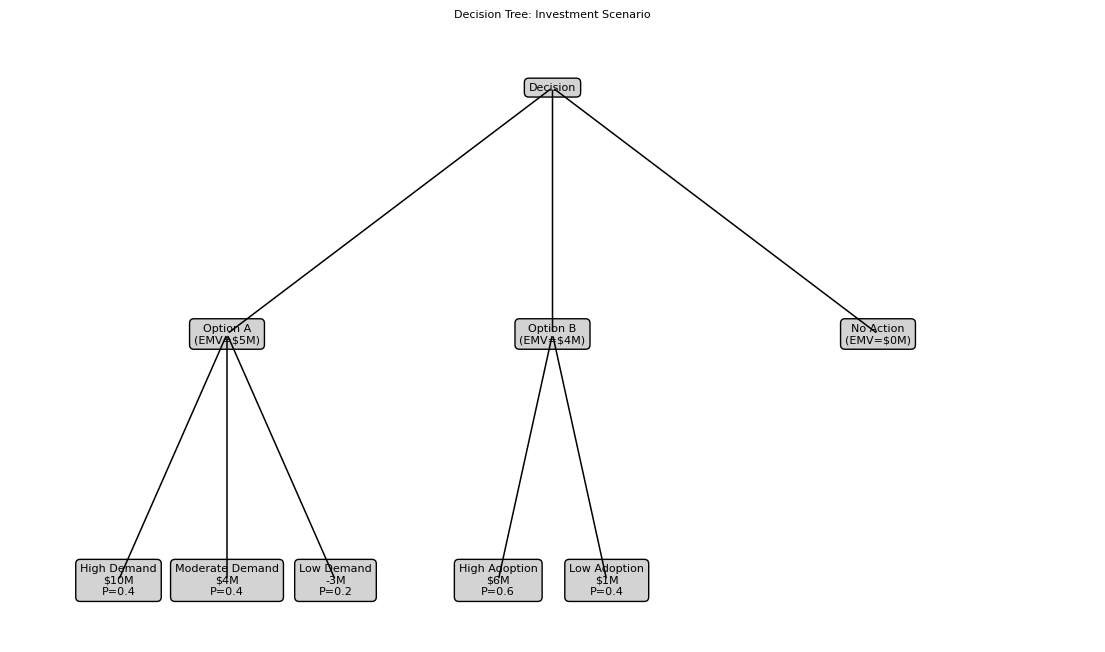

In [ ]:
import matplotlib.pyplot as plt

def draw_decision_tree():
    fig, ax = plt.subplots(figsize=(14, 8))
    ax.set_xlim(0, 1)
    ax.set_ylim(0.55, 1.05)
    ax.axis('off')
    plt.title("Decision Tree: Investment Scenario", fontsize=8)

    nodes = {
        'Start': (0.5, 1.0, 'Decision'),
        'A': (0.2, 0.8, 'Option A\n(EMV=$5M)'),
        'B': (0.5, 0.8, 'Option B\n(EMV=$4M)'),
        'NA': (0.8, 0.8, 'No Action\n(EMV=$0M)'),
        'A_High': (0.1, 0.6, 'High Demand\n$10M\nP=0.4'),
        'A_Med':  (0.2, 0.6, 'Moderate Demand\n$4M\nP=0.4'),
        'A_Low':  (0.3, 0.6, 'Low Demand\n-3M\nP=0.2'),
        'B_High': (0.45, 0.6, 'High Adoption\n$6M\nP=0.6'),
        'B_Low':  (0.55, 0.6, 'Low Adoption\n$1M\nP=0.4'),
    }

    def draw_node(key, x, y, label):
        ax.text(x, y, label, ha='center', va='center', fontsize=8,
                bbox=dict(boxstyle='round,pad=0.4', facecolor='lightgrey', edgecolor='black'))

    def draw_arrow(p1, p2):
        ax.annotate("",
                    xy=p2, xycoords='data',
                    xytext=p1, textcoords='data',
                    arrowprops=dict(arrowstyle="-", lw=1.1))

    for key, (x, y, label) in nodes.items():
        draw_node(key, x, y, label)

    draw_arrow(nodes['Start'][:2], nodes['A'][:2])
    draw_arrow(nodes['Start'][:2], nodes['B'][:2])
    draw_arrow(nodes['Start'][:2], nodes['NA'][:2])

    draw_arrow(nodes['A'][:2], nodes['A_High'][:2])
    draw_arrow(nodes['A'][:2], nodes['A_Med'][:2])
    draw_arrow(nodes['A'][:2], nodes['A_Low'][:2])

    draw_arrow(nodes['B'][:2], nodes['B_High'][:2])
    draw_arrow(nodes['B'][:2], nodes['B_Low'][:2])

    plt.show()

draw_decision_tree()

# Example 2


- Help a decision-maker choose between two investment options (Investment A and Investment B) under uncertainty about future market conditions.

Problem Components
- Alternatives (Decisions):

    - Investment A

    - Investment B

- States of Nature (Uncertain Events):

    - Bull Market

    - Bear Market

- Payoff Table (Profit Outcomes):

| Market Condition | Investment A | Investment B |
| ---------------- | ------------ | ------------ |
| Bull Market      | \$10,000     | \$8,000      |
| Bear Market      | \$2,000      | \$5,000      |



---



A- Build the Regret Table
- To compute the regret, subtract each value in a column from the best (maximum) outcome in that column.

- In the Bull Market, the best payoff is \$10,000, therefore, Investment A gets \$0 regret, Investment B gets \$2,000 regret.

- In the Bear Market, the best payoff is \$5,000, therefore, Investment B gets \$0 regret, Investment A gets \$3,000 regret.

so, the regret table will be:

| Market Condition | Best Payoff | Investment A | Investment B |
| ---------------- | ----------- | ------------ | ------------ |
| Bull Market      | \$10,000    | \$0          | \$2,000      |
| Bear Market      | \$5,000     | \$3,000      | \$0          |


B- calculate the maximum regret for each investment:

| Investment | Max Regret |
| ---------- | ---------- |
| A          | \$3,000    |
| B          | \$2,000    |


C- Apply the Minimax Regret Rule
  - The Minimax Regret Rule says:

  - Choose the option with the smallest maximum regret.

D- Make the final decision:

  - Choose investment B, as it has a lower maximum regret of $2,000.

In [ ]:
import pandas as pd

# define the payoff table
payoff_data = {
    'Market Condition': ['Bull Market', 'Bear Market'],
    'Investment A': [10000, 2000],
    'Investment B': [8000, 5000]
}

payoff_df = pd.DataFrame(payoff_data)
payoff_df.set_index('Market Condition', inplace=True)

print("=== Payoff Table ===")
print(payoff_df)

# compute regret table
regret_df = payoff_df.copy()

# For each market condition, find the best payoff and subtract other values from it
for condition in regret_df.index:
    best_outcome = payoff_df.loc[condition].max()
    regret_df.loc[condition] = best_outcome - payoff_df.loc[condition]

print("\n=== Regret Table ===")
print(regret_df)

# calculate maximum regret for each investment
max_regret = regret_df.max()
print("\n=== Maximum Regret per Investment ===")
print(max_regret)

# make decision using Minimax Regret
best_choice = max_regret.idxmin()
min_max_regret = max_regret.min()

print(f"\Recommended Decision: Choose **{best_choice}**")
print(f" (This minimizes the maximum regret: ${min_max_regret:,.0f})")


=== Payoff Table ===
                  Investment A  Investment B
Market Condition                            
Bull Market              10000          8000
Bear Market               2000          5000

=== Regret Table ===
                  Investment A  Investment B
Market Condition                            
Bull Market                  0          2000
Bear Market               3000             0

=== Maximum Regret per Investment ===
Investment A    3000
Investment B    2000
dtype: int64
\Recommended Decision: Choose **Investment B**
 (This minimizes the maximum regret: $2,000)




---


# Example 3
How much are you willing to pay for perfect information before making an investment?


## Scenario:
A company is evaluating three potential product launches:

- Product A (a premium item),

- Product B (a mid-range item),

- Product C (a budget-friendly item).

Future profits depend on the economic condition at launch time, which could be:

- Strong Economy (50% probability)

- Moderate Economy (30% probability)

- Weak Economy (20% probability)

### Payoff Table (Profits in $1,000s) is shown below:

| Economic Condition | Product A | Product B | Product C |
| ------------------ | --------- | --------- | --------- |
| Strong Economy     | \$120     | \$100     | \$70      |
| Moderate Economy   | \$80      | \$90      | \$60      |
| Weak Economy       | \$30      | \$50      | \$65      |



---



A - Calculate the expected value (EV) for each product, without perfect information. Then, the expected value for the best decision.

$E[X]= ∑ P(i)⋅x_i​$

 #### Product A:
- `E[A] = 0.5 * 120 + 0.3 * 80 + 0.2 * 30 = 60 + 24 + 6 = $90000`

#### Product B:

- `E[B] = 0.5 * 100 + 0.3 * 90 + 0.2 * 50 = 50 + 27 + 10 = $87000`

#### Product C:
- `E[C] = 0.5 * 70 + 0.3 * 60 + 0.2 * 65 = 35 + 18 + 13 = $66000`

### Conclusion:
- Best Decision Without Perfect Information = Product A
- `Expected Value Without Perfect Information = $90000`


---



B- Calculate the expected value with perfect information

- If the company knew the economic condition in advance:
- `Strong Economy (50%) → Choose Product A → Gain $120000`
- `Moderate Economy (30%) → Choose Product B → Gain $90000`
- `Weak Economy (20%) → Choose Product C → Gain $65000`

- Expected value with perfect information =
`0.5(120) + 0.3(90) + 0.2(65) = 60 + 27 + 13 = $100000`


---



C - Calculate the value of information before making the investment decisions:

- `VPI = E[Perfect Info] − max(E[No Info]) = 100000 − 90000 = $10000`


In [ ]:
import pandas as pd

# Define the data as a dictionary
data = {
    'Economic Condition': ['Strong', 'Moderate', 'Weak'],
    'Probability': [0.5, 0.3, 0.2],
    'Product A': [120, 80, 30],
    'Product B': [100, 90, 50],
    'Product C': [70, 60, 65]
}

# Create a DataFrame from the data
df = pd.DataFrame(data).set_index('Economic Condition')

# Print the payoff table
print("=== Payoff Table ===")
print(df)

# Calculate expected values without perfect information
expected_values = df[['Product A', 'Product B', 'Product C']].mul(df['Probability'], axis=0).sum()

print("\n=== Expected Value Without Perfect Information ===")
for product, ev in expected_values.items():
    print(f"{product}: ${ev:,.0f}")

# Determine best decision without perfect information and its expected value
best_product = expected_values.idxmax()
ev_without_perfect_info = expected_values.max()

# Calculate expected value with perfect information
df['Best Payoff'] = df[['Product A', 'Product B', 'Product C']].max(axis=1)
ev_with_perfect_info = (df['Best Payoff'] * df['Probability']).sum()

# Compute the value of perfect information
vpi = ev_with_perfect_info - ev_without_perfect_info

# Print results
print(f"\nBest Decision Without Perfect Info: {best_product}")
print(f"Expected Value Without Perfect Info(multiply by 1000s): ${ev_without_perfect_info:,.0f}")
print(f"Expected Value With Perfect Info (multiply by 1000s):    ${ev_with_perfect_info:,.0f}")
print(f"Value of Perfect Information (VPI) (multiply by 1000s): ${vpi:,.0f}")

=== Payoff Table ===
                    Probability  Product A  Product B  Product C
Economic Condition                                              
Strong                      0.5        120        100         70
Moderate                    0.3         80         90         60
Weak                        0.2         30         50         65

=== Expected Value Without Perfect Information ===
Product A: $90
Product B: $87
Product C: $66

Best Decision Without Perfect Info: Product A
Expected Value Without Perfect Info(multiply by 1000s): $90
Expected Value With Perfect Info (multiply by 1000s):    $100
Value of Perfect Information (VPI) (multiply by 1000s): $10


# Example 4
### How much would you pay for imperfect information before making an investment decision in stock market?

- The value of imperfect information is the improvement in expected value resulting from partially reliable information.

### Calculation Process
- Determine the reliability of the information (e.g., accuracy of a test or forecast).
- Use Bayes' theorem to update probabilities based on the new information.
- Recalculate expected values with the updated probabilities.
- Compare the new expected value with the original to determine the value of the imperfect information.

# Scenario
An investor is deciding between Stock A and Stock B, and the market condition could be:

- Bull Market (60% probability)
- Bear Market (40% probability)
- The investor consults a market analyst who gives a forecast with 80% accuracy.
    - Forecast Accuracy: the analyst is 80% accurate in predicting both bull and bear markets.This creates imperfect information (not perfect, but better than random guessing).

### Stock payoff in dollars:

| Market Condition | Stock A  | Stock B |
| ---------------- | -------- | ------- |
| Bull Market      | \$10,000 | \$8,000 |
| Bear Market      | \$2,000  | \$5,000 |



---


#### A - Compute the Expected Value (EV) for each stock, and make a decision:

`E[A]=0.6*10000 + 0.4*2000 = 6000 + 800 = $6800`

`E[B]=0.6*8000 + 0.4*5000 = 4800 + 2000 = $6800`

`Best choice (no info): Either Stock A or B`

`Expected value without information: $6800`



---


### B - Use Bayes' theorem to update the probabilities given the imperfect information

We want to compute:

`P(Bull ∣ Forecast = Bull)`

`P(Bear ∣ Forecast = Bear)`

Let’s use:

`P(Bull)=0.6`

`P(Bear)=0.4`

`P(Forecast = Bull ∣ Bull) = 0.8`

`P(Forecast = Bull ∣ Bear) = 0.2 (since it's 20% wrong)`

`P(Forecast = Bear ∣ Bull) = 0.2`

`P(Forecast = Bear ∣ Bear) = 0.8`



# Bayes Theorem:
Bayes' Theorem allows us to update the probability of a cause (market condition) given some new evidence (the forecast).

`P(Cause | Evidence) = P(Evidence | Cause) * P(Cause) / P(Evidence)`

In our case:

Cause = Market Condition (Bull or Bear)

Evidence = Analyst Forecast (Bull or Bear)

### Find the total probability of a "Bull" forecast

We don't know the true market, so we consider both scenarios that could lead to a "Bull" forecast:

It's actually a Bull Market, and the analyst correctly forecasts Bull, so,

- `P(Bull) * P(Forecast = Bull | Bull) = 0.6 * 0.8 = 0.48`

It's actually a Bear Market, and the analyst makes a mistake and forecasts Bull, so,
- `P(Bear) * P(Forecast = Bull | Bear) = 0.4 * 0.2 = 0.08`

So total probability of forecast = Bull:

- `P(Forecast = Bull)=0.48+0.08=0.56`



- `P(Bull | Forecast = Bull)= P(Forecast = Bull | Bull)*P(Bull)/p(Forcast = Bull) = (0.8)(0.6)/0.56 = 0.8571`

- `P(Bear | Forecast = Bull) = P (Forecast = Bull | Bear) * p(Bear)/ P(Forcast = Bull) = 0.2 * 0.4/ 0.56 = 0.1429`


So when the analyst predicts Bull, you should now believe:

There is an 85.71% chance the market is actually Bull.

And a there a 14.29% chance it's Bear.

# on the other hand, if the analyst says "Bear":
Do the same process:

It's actually Bear, and forecast is correct: 0.4 * 0.8 = 0.32

It's actually Bull, and forecast is wrong: 0.6 * 0.2 = 0.12

Total probability of forecast = Bear:

- `P(Forecast = Bear) = 0.32 + 0.12 = 0.44`

Bayes' Theorem again:

- `P(Bear | Forecast = Bear) = 0.8 * 0.4/0.44 = 0.7273`

- `P(Bull | Forecast = Bear) = 0.2 * 0.6/0.44 = 0.2727`




## Compute the Best Expected Payoffs for each forecast

A. If Forecast is Bull:
Expected payoff for:

- Stock A:

E_A = 0.8571 * 10000 + 0.1429 * 2000 = 8571 + 285.8 = 8856.8

- Stock B:

E_B = 0.8571 * 8000 + 0.1429 * 5000 = 6857 + 714.5 = 7571.5

if choose Stock A then the payoff = $8856.80



B. If Forecast is Bear:
Expected payoff for:

Stock A:
E_A = 0.2727 * 10000 + 0.7273 * 2000 = 4181.6

Stock B:

E_B = 0.2727 * 8000 + 0.7273 * 5000 = 5818.1

I choosing Stock B then the payoff = $5818.10

Total Expected Value with Imperfect Information (EVwII) =
- P(F = Bull) * 8856.8 + P(F = Bull) * 5818.1 = 0.56 * 8856.8 + 0.44 * 5818.1
= 7520 (rounded)


 Final Answer: Value of Imperfect Information
VOII = EVwII - EVwoI = 7520 - 6800 = $720

In [ ]:
'''
corrections to the first version:

Used maximum of expected values after updating beliefs via Bayes’ Theorem.

Correctly weighted expected values by the forecast probabilities.
'''


# Define base probabilities
P_bull = 0.6
P_bear = 0.4

# Analyst accuracy
accuracy = 0.8
error = 1 - accuracy

# Payoffs
payoff_A = {'Bull': 10000, 'Bear': 2000}
payoff_B = {'Bull': 8000, 'Bear': 5000}

# Calculate expected values without any information
EV_A = P_bull * payoff_A['Bull'] + P_bear * payoff_A['Bear']
EV_B = P_bull * payoff_B['Bull'] + P_bear * payoff_B['Bear']
EV_without_info = max(EV_A, EV_B)

# Bayes' Theorem: compute probabilities of each forecast
P_forecast_bull = (P_bull * accuracy) + (P_bear * error)
P_forecast_bear = (P_bull * error) + (P_bear * accuracy)

# Posterior probabilities using Bayes' Theorem
P_bull_given_forecast_bull = (P_bull * accuracy) / P_forecast_bull
P_bear_given_forecast_bull = (P_bear * error) / P_forecast_bull

P_bull_given_forecast_bear = (P_bull * error) / P_forecast_bear
P_bear_given_forecast_bear = (P_bear * accuracy) / P_forecast_bear

# Calculate expected payoffs for each forecast
# If forecast is Bull
EV_A_given_bull = P_bull_given_forecast_bull * payoff_A['Bull'] + P_bear_given_forecast_bull * payoff_A['Bear']
EV_B_given_bull = P_bull_given_forecast_bull * payoff_B['Bull'] + P_bear_given_forecast_bull * payoff_B['Bear']
EV_forecast_bull = max(EV_A_given_bull, EV_B_given_bull)

# If forecast is Bear
EV_A_given_bear = P_bull_given_forecast_bear * payoff_A['Bull'] + P_bear_given_forecast_bear * payoff_A['Bear']
EV_B_given_bear = P_bull_given_forecast_bear * payoff_B['Bull'] + P_bear_given_forecast_bear * payoff_B['Bear']
EV_forecast_bear = max(EV_A_given_bear, EV_B_given_bear)

# Compute total expected value with imperfect information
EV_with_info = P_forecast_bull * EV_forecast_bull + P_forecast_bear * EV_forecast_bear

# Value of Imperfect Information
VOI = EV_with_info - EV_without_info

# Display results
print("=== Expected Value Without Information ===")
print(f"EV[Stock A]: ${EV_A:,.0f}")
print(f"EV[Stock B]: ${EV_B:,.0f}")
print(f"Best EV (no info): ${EV_without_info:,.0f}")

print("\n=== Updated Probabilities Using Bayes' Theorem ===")
print(f"P(Bull | Forecast = Bull): {P_bull_given_forecast_bull:.4f}")
print(f"P(Bear | Forecast = Bear): {P_bear_given_forecast_bear:.4f}")

print("\n=== Expected Values with Imperfect Info ===")
print(f"EV (Forecast = Bull → Best Stock): ${EV_forecast_bull:,.0f}")
print(f"EV (Forecast = Bear → Best Stock): ${EV_forecast_bear:,.0f}")
print(f"EV with Imperfect Information: ${EV_with_info:,.0f}")
print(f"Value of Imperfect Information: ${VOI:,.0f}")


=== Expected Value Without Information ===
EV[Stock A]: $6,800
EV[Stock B]: $6,800
Best EV (no info): $6,800

=== Updated Probabilities Using Bayes' Theorem ===
P(Bull | Forecast = Bull): 0.8571
P(Bear | Forecast = Bear): 0.7273

=== Expected Values with Imperfect Info ===
EV (Forecast = Bull → Best Stock): $8,857
EV (Forecast = Bear → Best Stock): $5,818
EV with Imperfect Information: $7,520
Value of Imperfect Information: $720
